# Tri‑stable GAM – extinction and latent‑inhibition demos

In [ ]:
import numpy as np, matplotlib.pyplot as plt, importlib, sys, os
import tristable_GAM as tg
A,B,AB,patterns = tg.A, tg.B, tg.AB, tg.PATTERNS

## Extinction

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


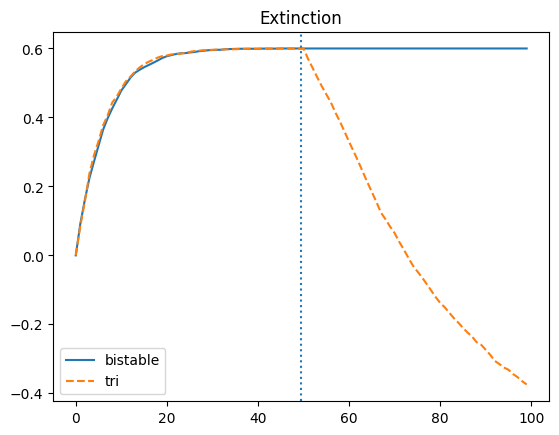

In [ ]:
idx = np.zeros(100,dtype=int)
us  = np.r_[np.ones(50,int), np.zeros(50,int)]
h_bi  = tg.simulate(idx,patterns,us,'bistable',seed=1)
h_tri = tg.simulate(idx,patterns,us,'tristable',seed=1)
plt.plot(h_bi,label='bistable'); plt.plot(h_tri,'--',label='tri')
plt.axvline(49.5,ls=':'); plt.title('Extinction'); plt.legend(); plt.show()

## Latent inhibition

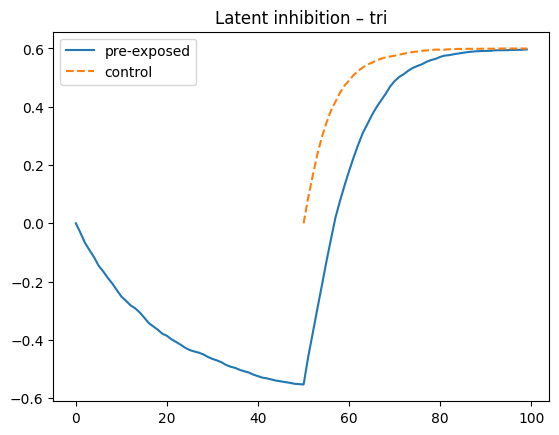

In [4]:

idx_pre = np.zeros(100,int); us_pre = np.r_[np.zeros(50,int),np.ones(50,int)]
idx_ctrl= np.zeros(50,int);  us_ctrl= np.ones(50,int)
h_tri_pre = tg.simulate(idx_pre,patterns,us_pre,'tristable',seed=2)
h_tri_ctrl= tg.simulate(idx_ctrl,patterns,us_ctrl,'tristable',seed=2)
pad=np.full(50,np.nan); plt.plot(h_tri_pre,label='pre‑exposed')
plt.plot(np.r_[pad,h_tri_ctrl],'--',label='control'); plt.title('Latent inhibition – tri')
plt.legend(); plt.show()


# Capacity

Best capacity bi-stable: 60
Best capacity tri-stable: 60


Text(0, 0.5, 'q_unused2neg')

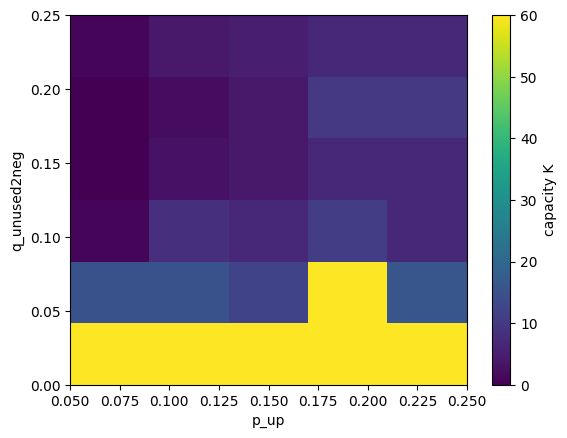

In [7]:
import numpy as np, matplotlib.pyplot as plt, importlib, sys
sys.path.append('/mnt/data')
import tristable_GAM as tg             # your module

def capacity_K(N, model, p, q, reps=10, threshold=0.3,
               max_K=60, seed=0):
    rng = np.random.default_rng(seed)
    patterns = rng.integers(0,2,(max_K,N))
    M = np.zeros(N,int)
    for k in range(max_K):
        for _ in range(reps):
            if model=='bistable':
                M = tg.update_bistable(M, patterns[k], 1,
                                       p_up=p, q_down=q)
            else:
                M = tg.update_tristable(M, patterns[k], 1,
                                        p_up=p,
                                        q_unused2neg=q,
                                        p_active_decay=0.04,
                                        q_zero2neg=0.0)
        recall = np.mean([(patterns[j]@M)/N for j in range(k+1)])
        if recall < threshold:
            return k          # capacity reached
    return max_K              # didn’t fail yet

# sweep
p_vals = np.linspace(0.05,0.25,5)
q_vals = np.linspace(0.0,0.25,6)
cap_best_bi  = 0
cap_best_tri = 0
for p in p_vals:
    for q in q_vals:
        cap_best_bi  = max(cap_best_bi,
                           capacity_K(20,'bistable', p,q))
        cap_best_tri = max(cap_best_tri,
                           capacity_K(20,'tristable',p,q))

print("Best capacity bi-stable:",  cap_best_bi)
print("Best capacity tri-stable:", cap_best_tri)

cap = np.array([[capacity_K(20,'bistable',p,q)
                 for p in p_vals] for q in q_vals])
plt.imshow(cap, origin='lower',
           extent=[p_vals[0],p_vals[-1],q_vals[0],q_vals[-1]],
           cmap='viridis', aspect='auto')
plt.colorbar(label='capacity K')
plt.xlabel('p_up'); plt.ylabel('q_unused2neg')
